# **Import the Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = "/content/drive/MyDrive/Framingham.csv"
Framingham_data = pd.read_csv(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Overview of the Data**

Use .head() and .info function to take a first look at the datasets.

In [ ]:
Framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
Framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Missing value and data cleaning**

Let's check the data types and missing value percentage of each column in this dataset.

In [ ]:
Framingham_data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
Framingham_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
Framingham_data.isnull().mean() * 100


male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

From the printout, we can see that all attributes that have null values are not categorical variables except "education" and "BPMeds".

For the educational column, we consider NA at this column to be non educated people. In this case, we should change Null value at education column to 0.

In [ ]:
#fill null value at education column with 0
Framingham_data['education'].fillna(0, inplace=True)

For BPMeds column, we consider missing value to be not on any medications, so we should change all null value in BPMeds column to 0.

In [ ]:
#fill null value at education column with 0
Framingham_data['BPMeds'].fillna(0, inplace=True)


For heartRate column, there is only one missing data and the person is a smoker, so we will fill it with mean of the heartrate for smokers.

In [ ]:
Framingham_data['heartRate'].fillna(Framingham_data['heartRate'].where(Framingham_data['currentSmoker']==1).mean(), inplace=True)

For cigPerDay column, we will fill it with mean of the cig p for smokers.



In [ ]:
Framingham_data['cigsPerDay'].fillna(Framingham_data['cigsPerDay'].where(Framingham_data['currentSmoker']==1).mean(), inplace=True)

As none of the attribute's null value percentage is above 10%, we should fill the null value with mean

In [ ]:
#fill null value with mean
Framingham_data['glucose'].fillna(Framingham_data['glucose'].mean(), inplace=True)
Framingham_data['totChol'].fillna(Framingham_data['totChol'].mean(), inplace=True)
Framingham_data['BMI'].fillna(Framingham_data['BMI'].mean(), inplace=True)


In [ ]:
#check if there is any null value left
Framingham_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# **Aggregation**

In [ ]:
Framingham_data.dropna().describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,9.069889,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.879161,81.963655,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.906581,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023935,22.831748,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Data Visualization**

### Figure 1:
At first, as we are looking into we should look at the value count between having ten year CHD and not having ten year CHD

Text(0.5, 1.0, 'Risky for Ten Year CHD')

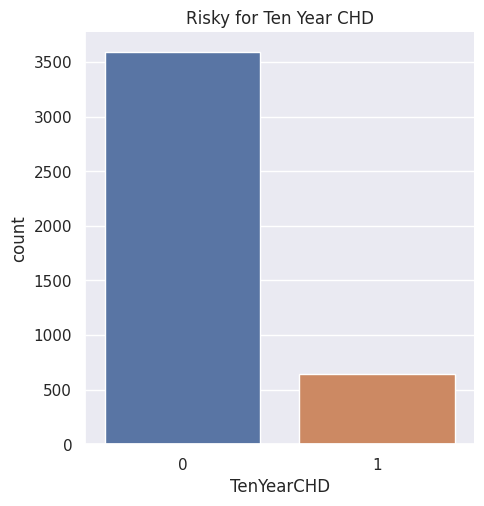

In [ ]:
sns.catplot(x="TenYearCHD", kind="count",data=Framingham_data)
plt.title('Risky for Ten Year CHD')

As a result, according to this dataset, 84.8% of this research population are not risky at having Ten Year CHD, 15.2 percent are risky at having Ten Year CHD

### Figure 2:
Now let's look into the distribution among genders

Text(0.5, 1.0, 'Ten Year CHD count between male and female')

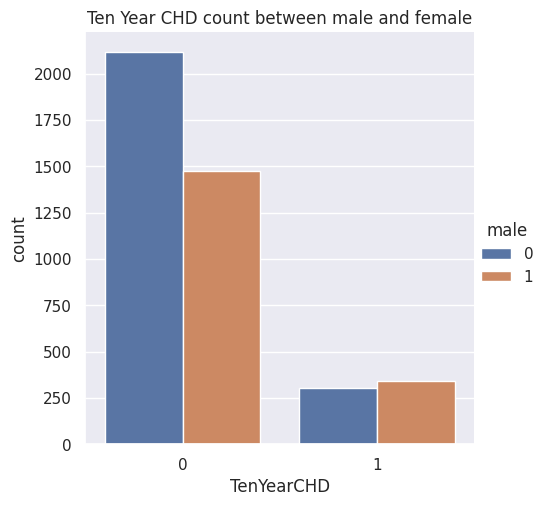

In [ ]:
sns.catplot(x="TenYearCHD", kind="count", hue='male',data=Framingham_data)
plt.title('Ten Year CHD count between male and female')

From this firgue, we can see that there are more males (1) at risk of having Ten Year CHD (1)

### Figure 3:
Now let's look into the distribution among age

Text(0.5, 1.0, 'Ten Year CHD count distribution among age')

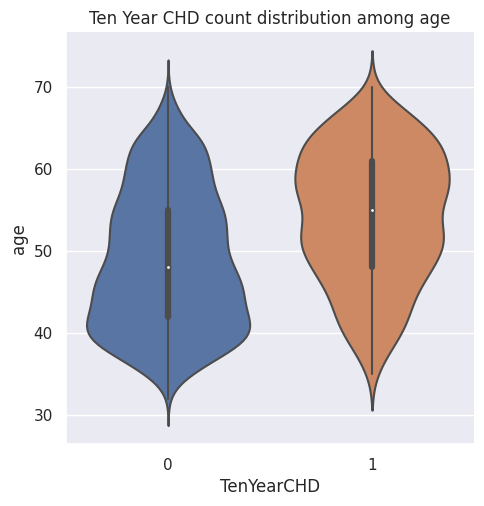

In [ ]:
sns.catplot(x="TenYearCHD", y="age", kind="violin", data=Framingham_data)
plt.title('Ten Year CHD count distribution among age')

From this firgue, we can see that age around 40-45 tend to have lower risk of having Ten Year CHD, age around 60-65 tend to have high risk of having Ten Year CHD.

### Figure 4:
Now let's look into the connection between age, blood pressure and CHD

Text(0.5, 1.0, 'Relationship between Ten Year CHD, age and diastolic blood pressure ')

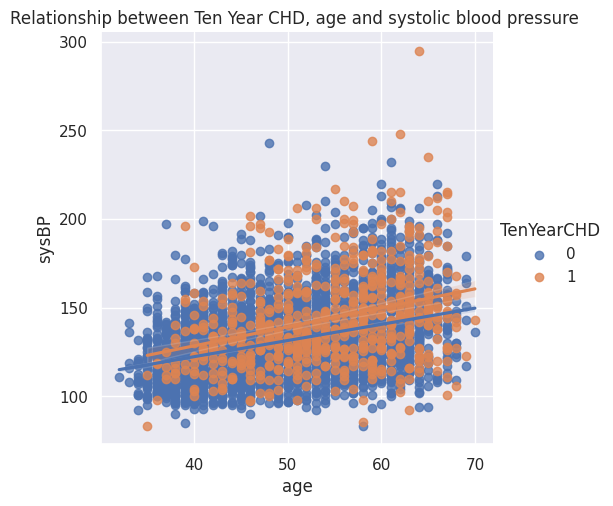

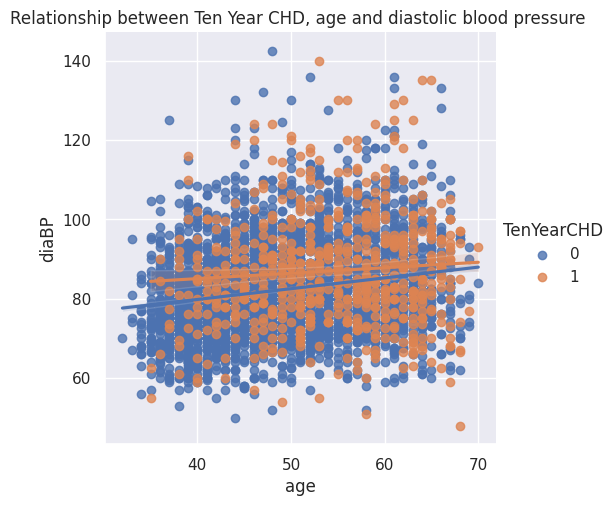

In [ ]:
sns.lmplot(x='age', y='sysBP', hue='TenYearCHD',data=Framingham_data)
plt.title('Relationship between Ten Year CHD, age and systolic blood pressure ')
sns.lmplot(x='age', y='diaBP', hue='TenYearCHD',data=Framingham_data)
plt.title('Relationship between Ten Year CHD, age and diastolic blood pressure ')

From these graphs, we can see that people tend to have a higher risk of having Ten Year CHD if their blood pressure are higher.

### Figure 5:
Now let's look into the connection between age glucise and CHD

Text(0.5, 1.0, 'Relationship between Ten Year CHD, age and glucise ')

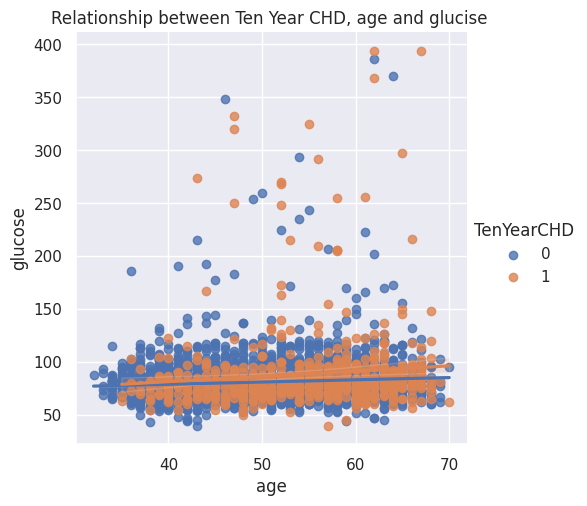

In [ ]:
sns.lmplot(x='age', y='glucose', hue='TenYearCHD',data=Framingham_data)
plt.title('Relationship between Ten Year CHD, age and glucise ')

From these graphs, we can see that people tend to have a higher risk of having Ten Year CHD if their Glucose are higher.